# SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

Read in training data:

In [2]:
X_train = pd.read_csv('data/train/X_train.csv')
y_train = np.ravel(pd.read_csv('data/train/y_train.csv'))

### Model creation and training:

In [3]:
model = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', probability=True)
model.fit(X_train,y_train)

SVC(gamma='auto', kernel='linear', probability=True)

### Prediction on training set:

In [4]:
y_train_pred = model.predict(X_train)

In [5]:
print('Confusion matrix: \n', confusion_matrix(y_train, y_train_pred))
print('\nClassification report: \n', classification_report(y_train, y_train_pred, zero_division=True))

Confusion matrix: 
 [[192   0]
 [  0 209]]

Classification report: 
               precision    recall  f1-score   support

      Modern       1.00      1.00      1.00       192
 Renaissance       1.00      1.00      1.00       209

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



### Testing model:

Read in test data:

In [6]:
X_test = pd.read_csv('data/test/X_test.csv')
y_test = np.ravel(pd.read_csv('data/test/y_test.csv'))
# y_test

In [7]:
y_test_pred = model.predict(X_test)
# y_test_pred

In [8]:
print('Confusion matrix: \n', confusion_matrix(y_test, y_test_pred))
print('\nClassification report: \n', classification_report(y_test, y_test_pred, zero_division=True))

Confusion matrix: 
 [[ 58   8]
 [  3 103]]

Classification report: 
               precision    recall  f1-score   support

      Modern       0.95      0.88      0.91        66
 Renaissance       0.93      0.97      0.95       106

    accuracy                           0.94       172
   macro avg       0.94      0.93      0.93       172
weighted avg       0.94      0.94      0.94       172



#### Saving predictions and probablilities for model comparison:

In [9]:
pd.DataFrame(y_test_pred).to_csv('results/svm_pred.csv', index=False)
pd.DataFrame(model.predict_proba(X_test)[:,1]).to_csv('results/svm_prob.csv', index=False)

### ROC curve - for validation and for testing data

In [10]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

In [11]:
#test data
y_score1 = model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
test_score = round(roc_auc_score(y_test, y_score1), 2)
#valiataion data
y_score2 = model.predict_proba(X_train)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_train, y_score2)
val_score = round(roc_auc_score(y_train, y_score2), 2)

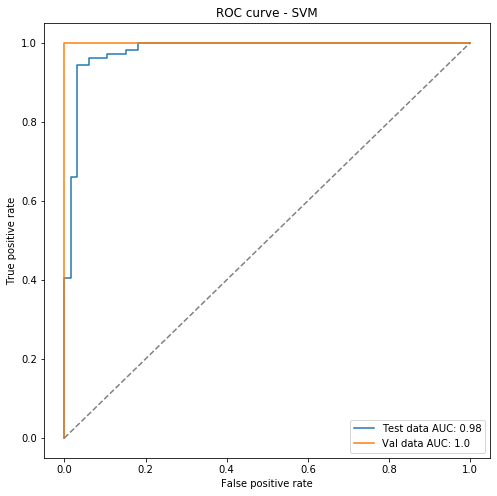

In [13]:
plt.subplots(1, figsize=(8,8))
plt.title('ROC curve - SVM')
#roc curve for test data
plt.plot(false_positive_rate1, true_positive_rate1, label="Test data AUC: " + str(test_score))
#roc curve for val data
plt.plot(false_positive_rate2, true_positive_rate2, label="Val data AUC: " + str(val_score))
plt.plot([0, 1], ls="--", color='gray')
plt.legend(loc='lower right')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()